<a href="https://colab.research.google.com/github/greeshmapj/AI-ML-nov2025-assignments/blob/main/Greeshma_assignment_regresssion(03).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Data Exploration

##1.1 Load the dataset

In [37]:
import pandas as pd
df = pd.read_csv('/content/car details v4.csv')
print(df.head())

            Make                            Model    Price  Year  Kilometer  \
0          Honda              Amaze 1.2 VX i-VTEC   505000  2017      87150   
1  Maruti Suzuki                  Swift DZire VDI   450000  2014      75000   
2        Hyundai             i10 Magna 1.2 Kappa2   220000  2011      67000   
3         Toyota                         Glanza G   799000  2019      37500   
4         Toyota  Innova 2.4 VX 7 STR [2016-2020]  1950000  2018      69000   

  Fuel Type Transmission   Location   Color   Owner Seller Type   Engine  \
0    Petrol       Manual       Pune    Grey   First   Corporate  1198 cc   
1    Diesel       Manual   Ludhiana   White  Second  Individual  1248 cc   
2    Petrol       Manual    Lucknow  Maroon   First  Individual  1197 cc   
3    Petrol       Manual  Mangalore     Red   First  Individual  1197 cc   
4    Diesel       Manual     Mumbai    Grey   First  Individual  2393 cc   

            Max Power              Max Torque Drivetrain  Length   W

##1.2 Dataset overview

In [38]:
print(df.shape)

(2059, 20)


In [39]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

# **Insight**


* 2,059 rows and 20 columns
* Mix of numerical and categorical features
* missing values present
* Target variable: Price






In [40]:
#Converting max power and max torque to numeric columns for better data processing
df['Max Power'] = df['Max Power'].str.extract(r'(\d+\.?\d*)').astype(float)
df['Max Torque'] = df['Max Torque'].str.extract(r'(\d+\.?\d*)').astype(float)


In [41]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   float64
 13  Max Torque          1979 non-null   float64
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

##1.3 Distribution of Attributes


###a) Distribution of Target Variable - Price


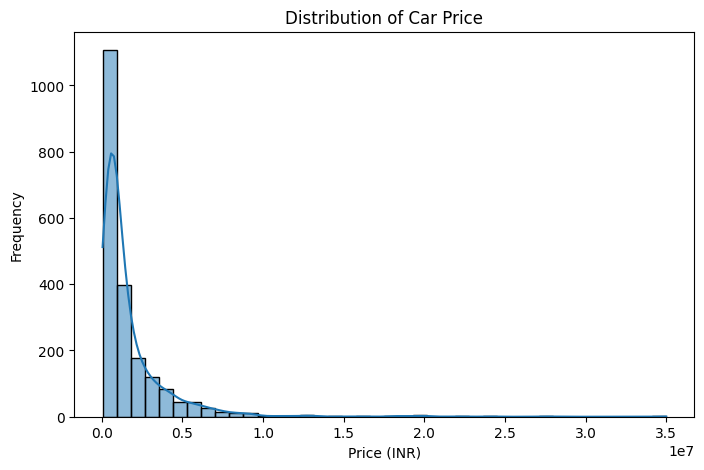

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df['Price'], kde=True, bins=40)
plt.title("Distribution of Car Price")
plt.xlabel("Price (INR)")
plt.ylabel("Frequency")
plt.show()

Insight - Right skewed




###b) Distribution of Numerical Features









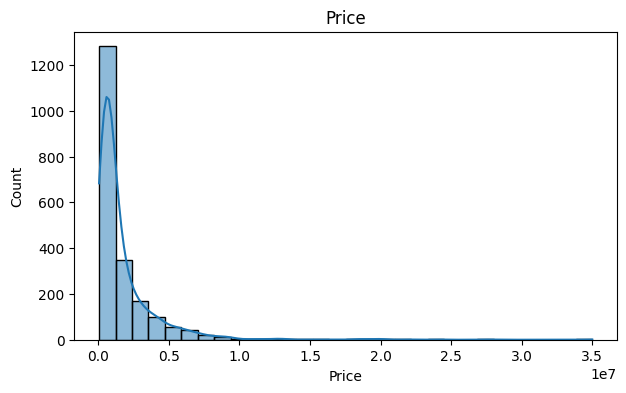

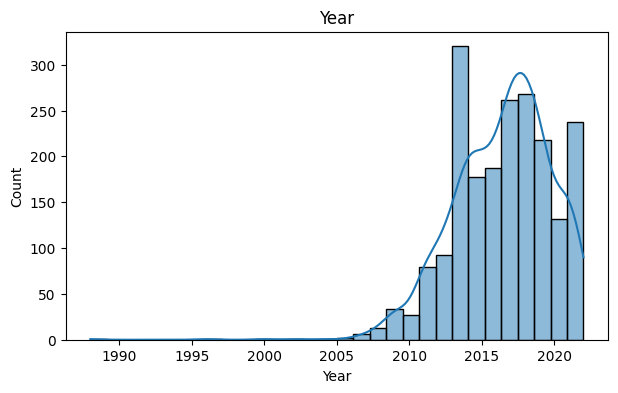

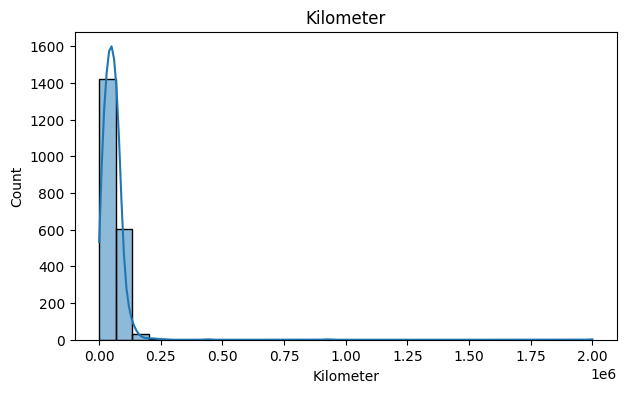

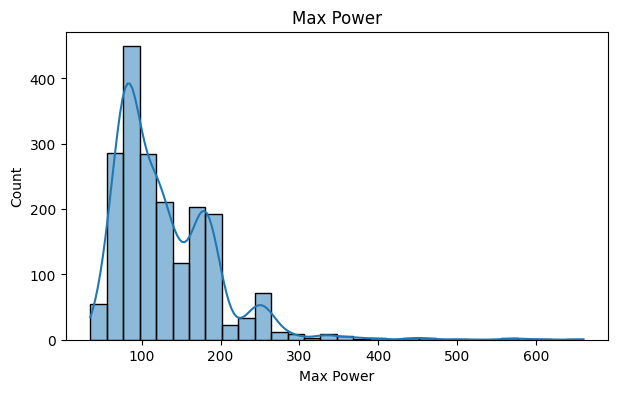

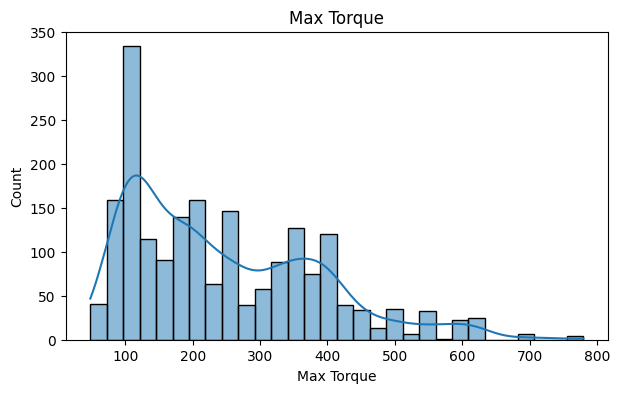

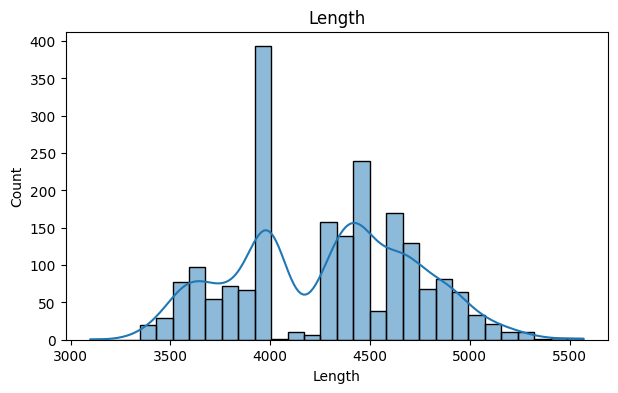

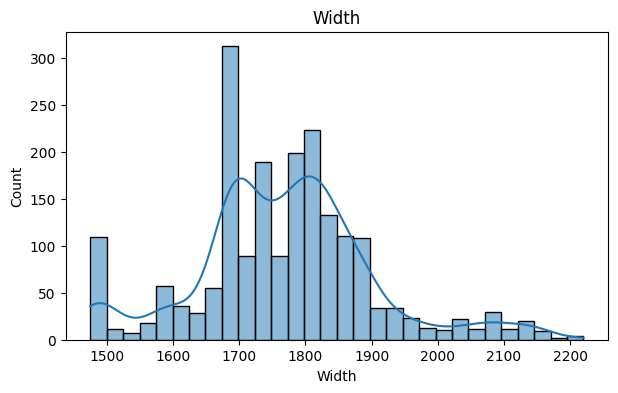

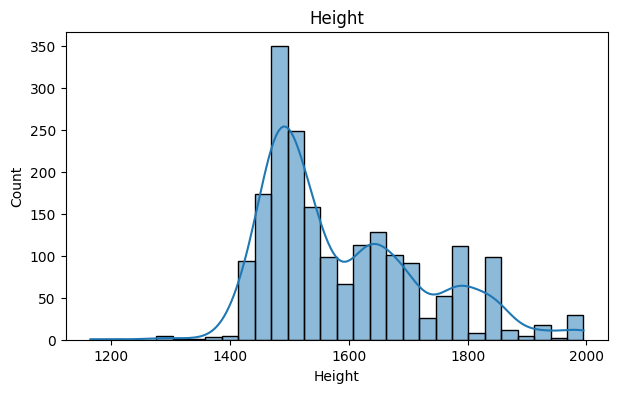

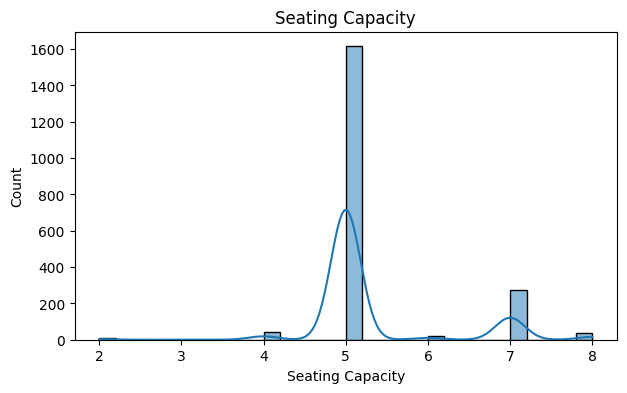

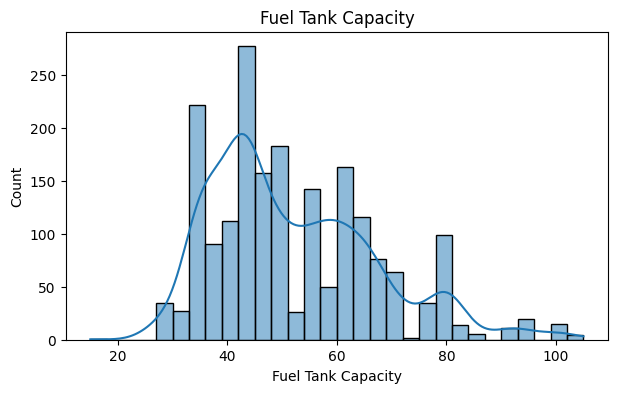

In [43]:
num_cols = df.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
    plt.show()


# **Insight**
Most numerical features show skewed distributions rather than normal distributions.
*   Kilometer -right skewed indicating many cars are moderately used while few  
are extremely high mileage.
*   Length, Width, Height - normal distribution
*   Fuel Tank Capacity - right skewed
*   Seating Capacity - shows limited variation, with most cars having 5 seats
*   Year(car age) - left skewed
*  max power, max torque - right skewed with long prevailing tails

###c) Distribution of Categorical Features


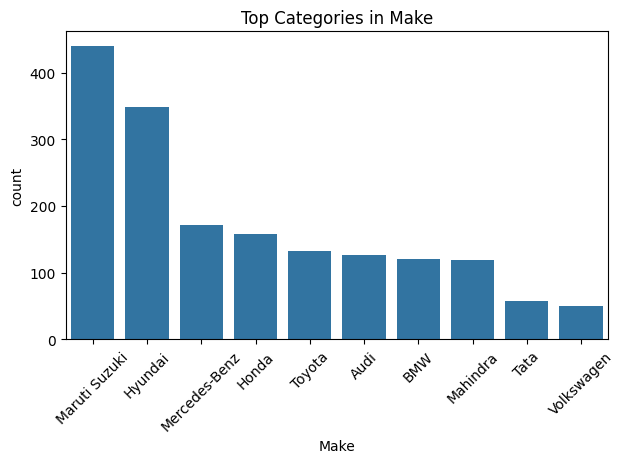

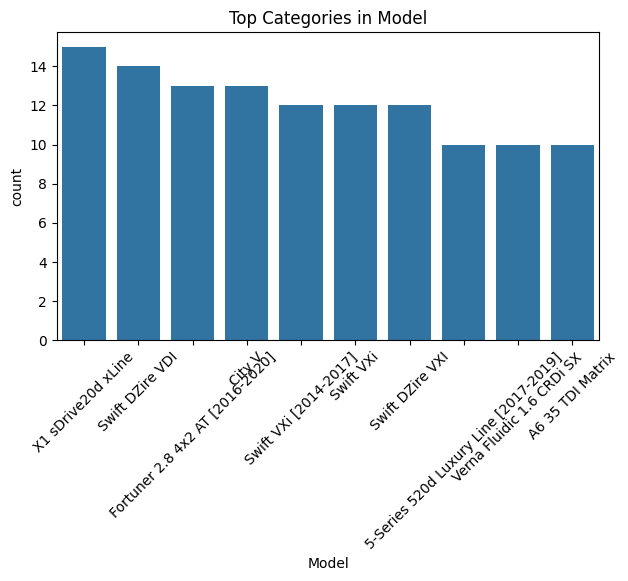

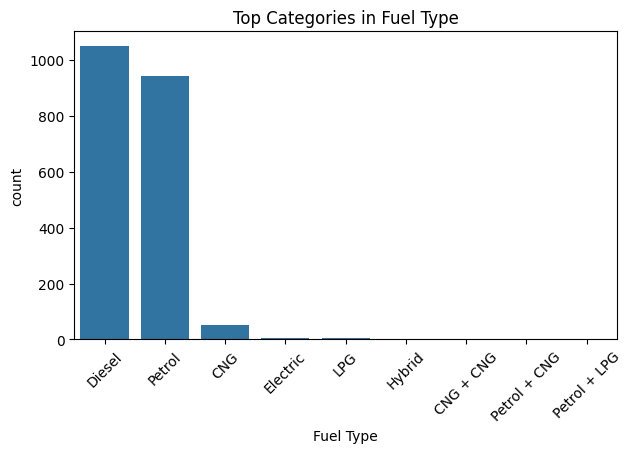

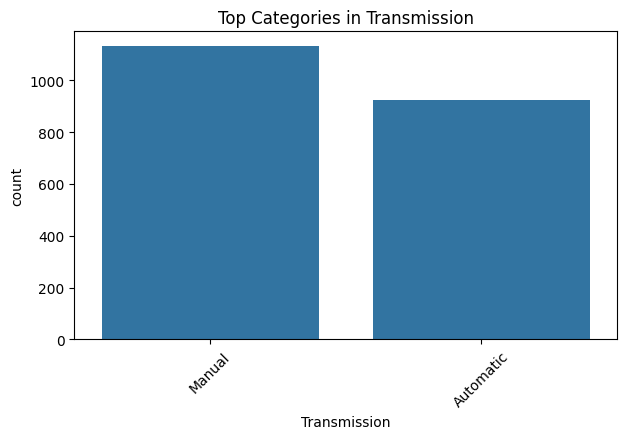

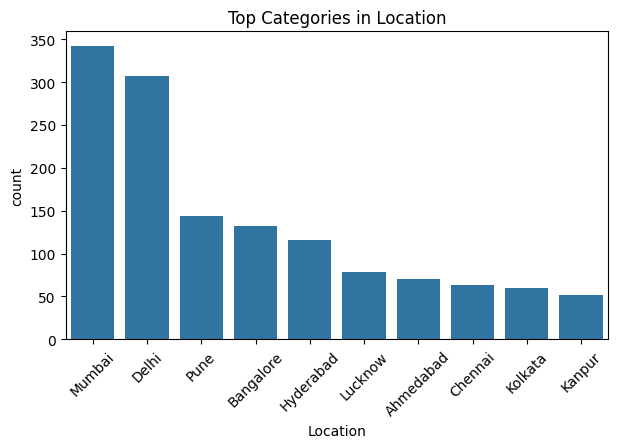

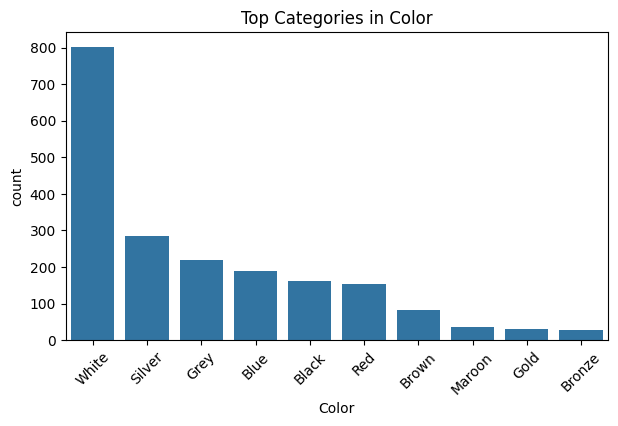

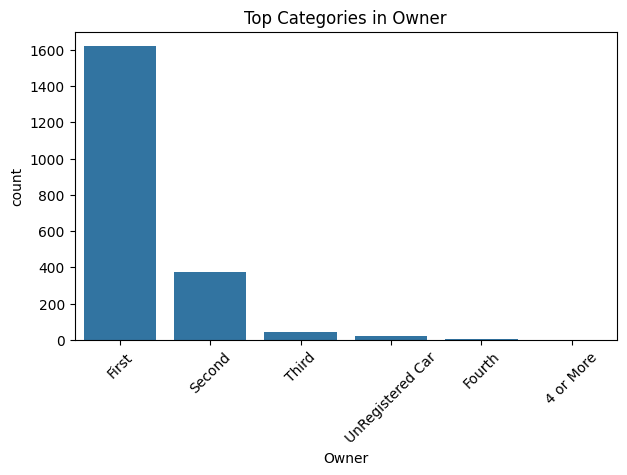

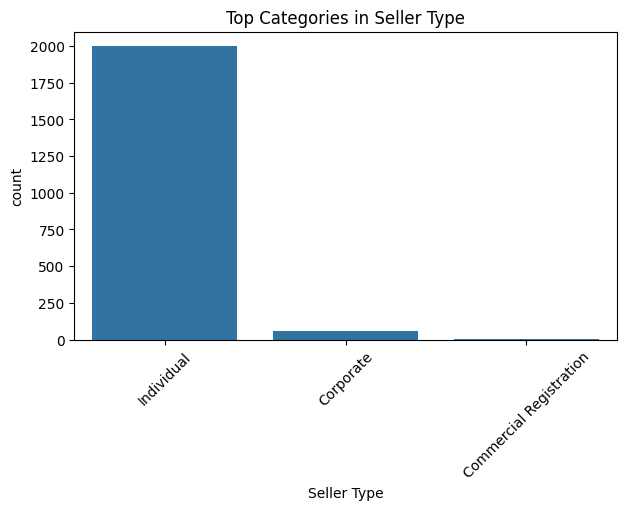

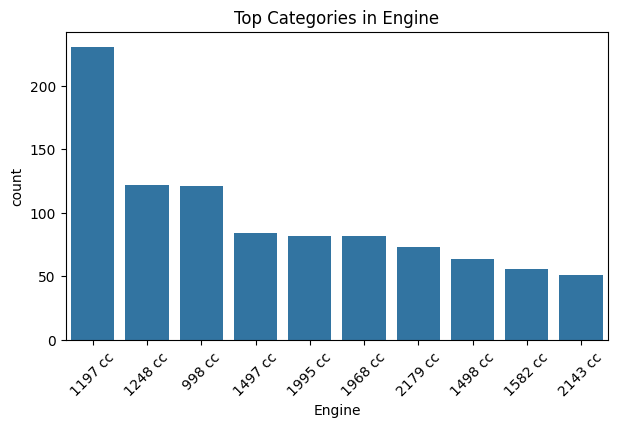

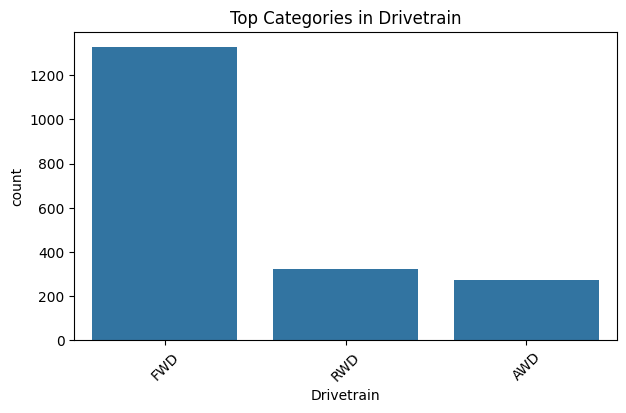

In [44]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(x=df[col], order=df[col].value_counts().index[:10])
    plt.title(f"Top Categories in {col}")
    plt.xticks(rotation=45)
    plt.show()


# **Insight**
petrol and diesel vehicles are more common than electric or CNG vehicles.

*   petrol and diesel vehicles are more common than electric or CNG vehicles.
*   Manual transmission vehicles usually appear more frequently than automatic vehicles in used car markets.
*   Individual sellers are often more common than dealers.


##1.4) Relationship Between Features and Target Variable


###🔹 Numerical vs Price

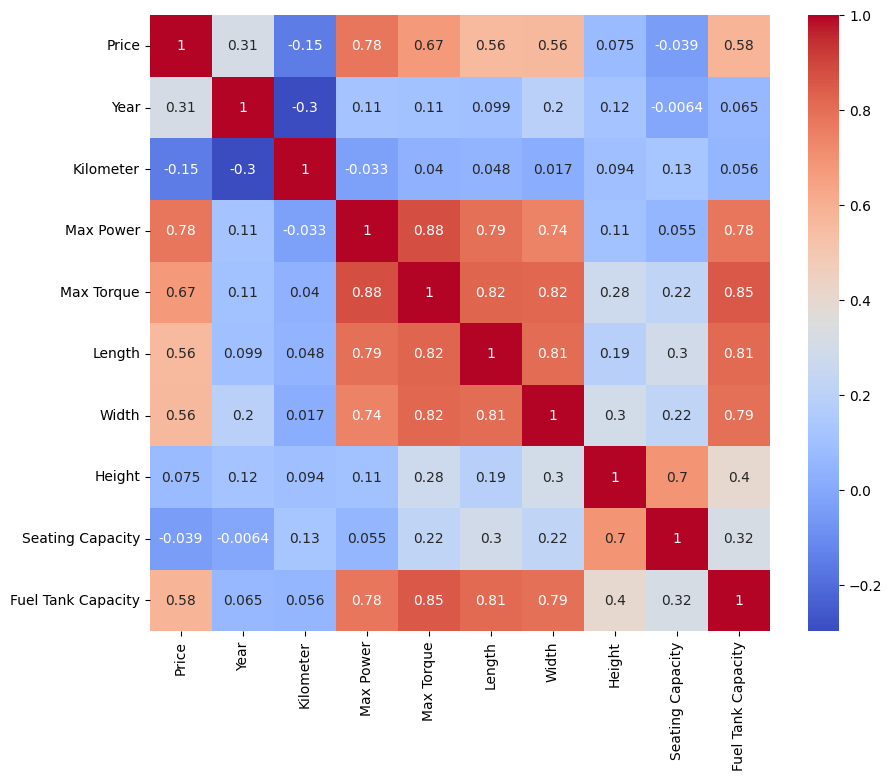

In [45]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()


# **Insight**

*   Numerical correlation analysis usually shows that engine capacity, power, and torque are positively correlated with price, meaning higher performance cars generally cost more.
*   Kilometer driven typically shows negative correlation with price, indicating that more used cars have lower resale value.
*  Car age also negatively affects price as newer cars retain higher value.

###🔹 Categorical vs Price

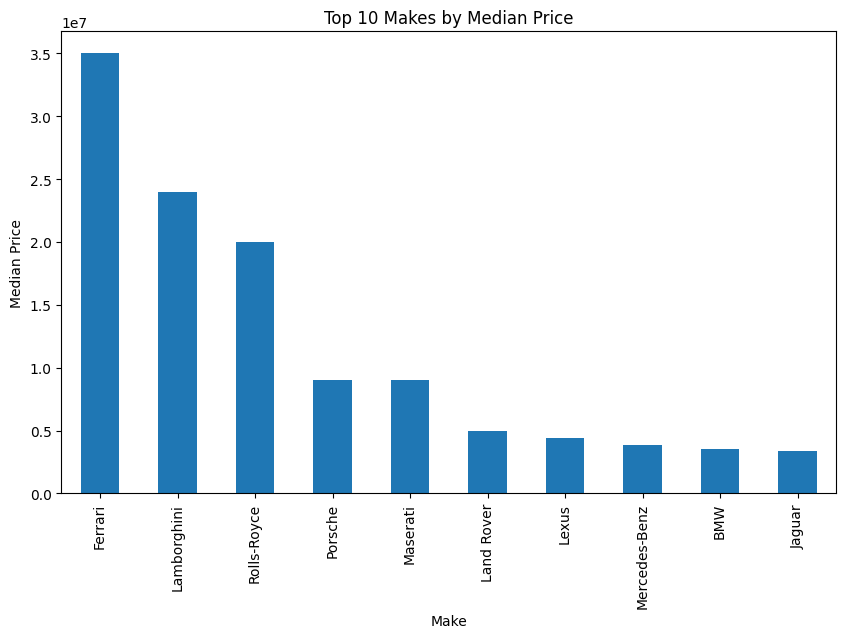

In [46]:
#Make vs Price
make_price = df.groupby('Make')['Price'].median().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
make_price.plot(kind='bar')
plt.title("Top 10 Makes by Median Price")
plt.ylabel("Median Price")
plt.show()


#**Insight**
Luxury brands typically have higher median selling prices, while mass-market brands have lower median prices.

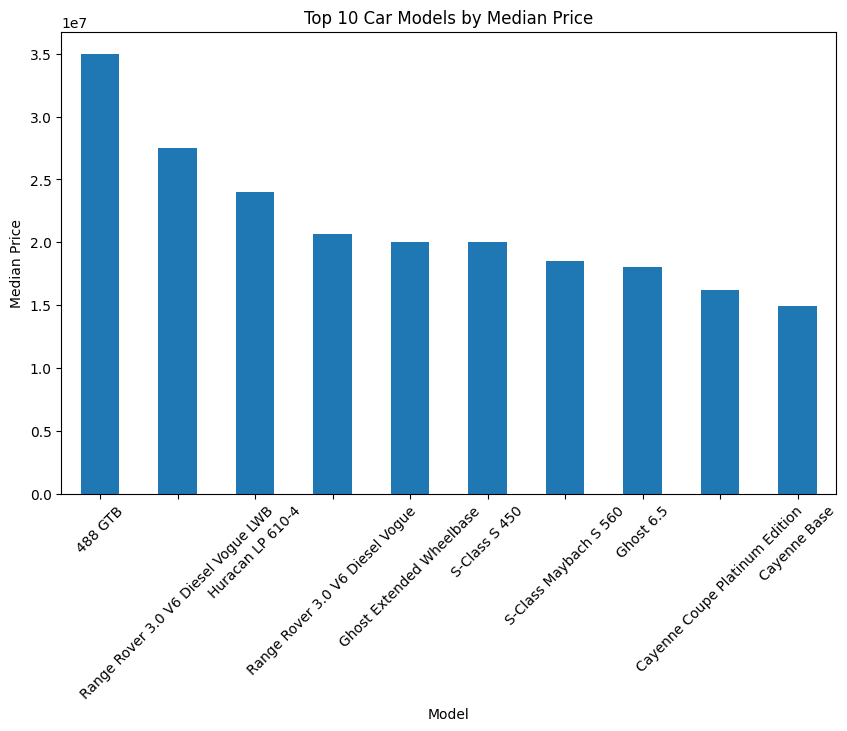

In [47]:
#Model vs Price

model_price = (
    df.groupby('Model')['Price']
    .median()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
model_price.plot(kind='bar')
plt.title("Top 10 Car Models by Median Price")
plt.ylabel("Median Price")
plt.xticks(rotation=45)
plt.show()


#**Insight**
Certain premium models dominate the high price segment, indicating strong brand-model influence on resale value.

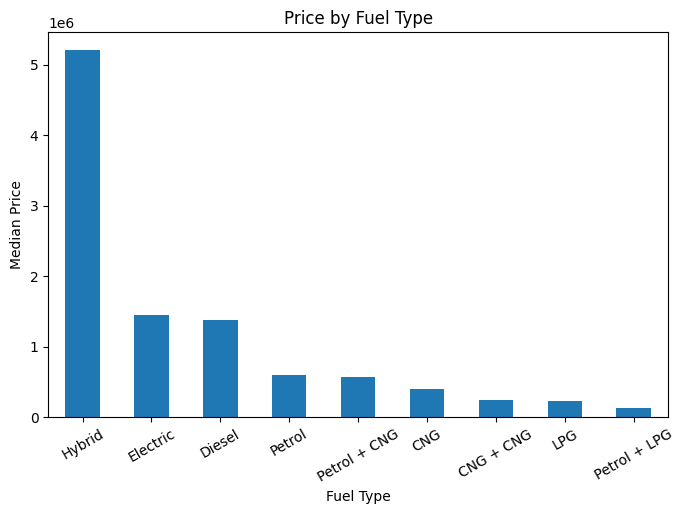

In [48]:
#Fuel-Type vs Price

fuel_price = (
    df.groupby('Fuel Type')['Price']
    .median()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8,5))
fuel_price.plot(kind='bar')
plt.title("Price by Fuel Type")
plt.ylabel("Median Price")
plt.xticks(rotation=30)
plt.show()


#**Insight**
*  Hybrid vehicles have the highest median price in this dataset.
* Electric and Diesel vehicles have similar and moderately high median prices.
* Petrol + LPG vehicles have the lowest median price in this dataset.

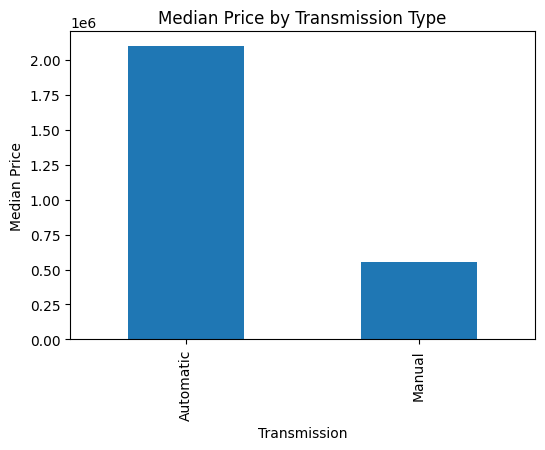

In [49]:
#Transmission vs Price

trans_price = (
    df.groupby('Transmission')['Price']
    .median()
    .sort_values(ascending=False)
)

plt.figure(figsize=(6,4))
trans_price.plot(kind='bar')
plt.title("Median Price by Transmission Type")
plt.ylabel("Median Price")
plt.show()


#**Insight**
Automatic vehicles have higher median prices due to higher manufacturing and demand value.

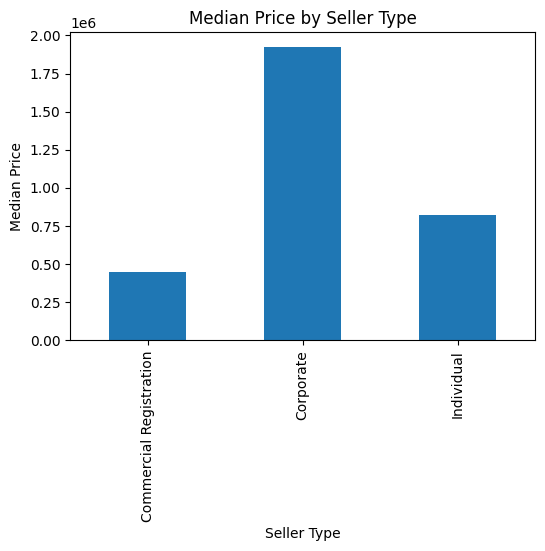

In [50]:
#Seller-Type vs Price
seller_price = (
    df.groupby('Seller Type')['Price']
    .median()
)

plt.figure(figsize=(6,4))
seller_price.plot(kind='bar')
plt.title("Median Price by Seller Type")
plt.ylabel("Median Price")
plt.show()


#**Insight**
Corporate have higher median prices followed by individuals.

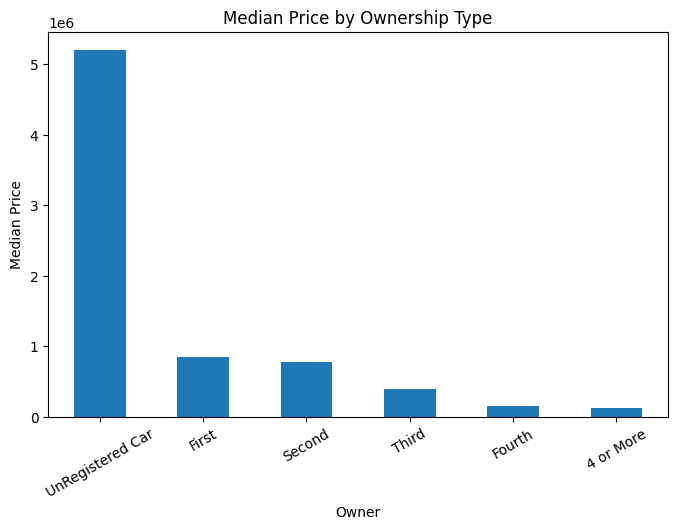

In [51]:
#Owner vs Price

owner_price = (
    df.groupby('Owner')['Price']
    .median()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8,5))
owner_price.plot(kind='bar')
plt.title("Median Price by Ownership Type")
plt.ylabel("Median Price")
plt.xticks(rotation=30)
plt.show()


#**Insight**
* Unregistered cars have the highest median price in this dataset.
* First owner cars have higher median price than second owner cars.
* Price decreases as number of owners increases.


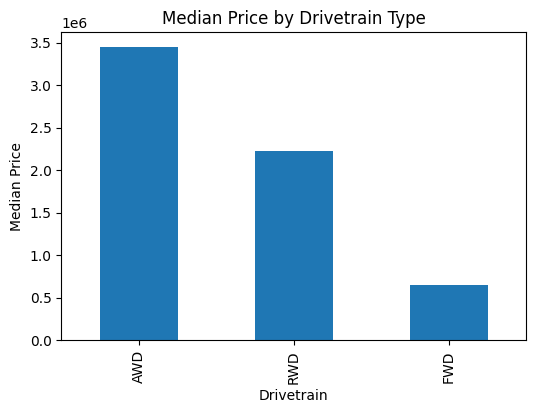

In [52]:
#DriveTrain vs Price

drive_price = (
    df.groupby('Drivetrain')['Price']
    .median()
    .sort_values(ascending=False)
)

plt.figure(figsize=(6,4))
drive_price.plot(kind='bar')
plt.title("Median Price by Drivetrain Type")
plt.ylabel("Median Price")
plt.show()


#**Insight**
* AWD has the highest Median Price followed by RWD   

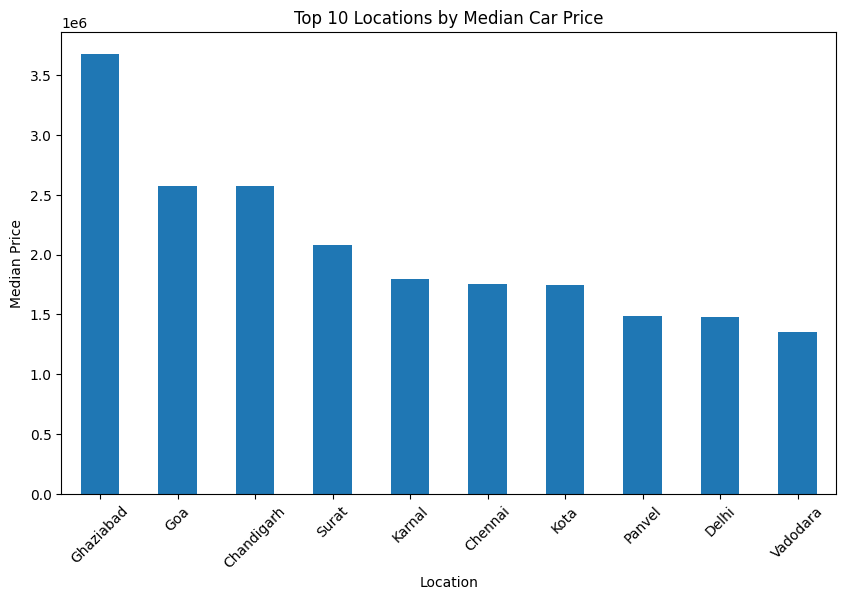

In [53]:
#Location vs Price

loc_price = (
    df.groupby('Location')['Price']
    .median()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
loc_price.plot(kind='bar')
plt.title("Top 10 Locations by Median Car Price")
plt.ylabel("Median Price")
plt.xticks(rotation=45)
plt.show()


#**Insight**
* Ghaziabad has the highest and Vadodara has the lowest median price.

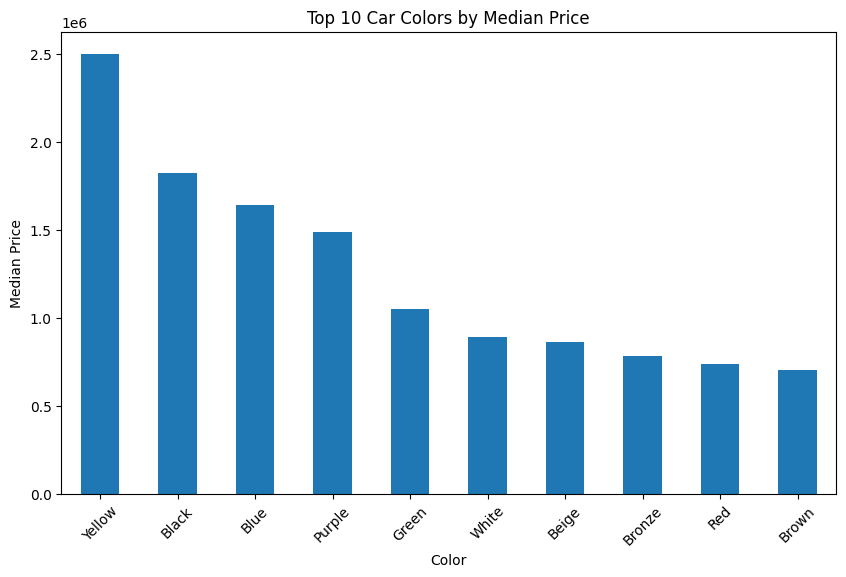

In [54]:
#Colour vs Price

color_price = (
    df.groupby('Color')['Price']
    .median()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
color_price.plot(kind='bar')
plt.title("Top 10 Car Colors by Median Price")
plt.ylabel("Median Price")
plt.xticks(rotation=45)
plt.show()


#**Insight**
* Yellow is the most preferred color and brown is the least preferred color.

#2. Data Preprocessing


##2.1 Check missing values

In [55]:
print(round(df.isnull().mean()*100,2))

Make                  0.00
Model                 0.00
Price                 0.00
Year                  0.00
Kilometer             0.00
Fuel Type             0.00
Transmission          0.00
Location              0.00
Color                 0.00
Owner                 0.00
Seller Type           0.00
Engine                3.89
Max Power             3.89
Max Torque            3.89
Drivetrain            6.61
Length                3.11
Width                 3.11
Height                3.11
Seating Capacity      3.11
Fuel Tank Capacity    5.49
dtype: float64


##Handle missing values

In [56]:
#Categorical MIssing Values -- Mode
cat_missing_cols = ['Engine', 'Drivetrain']

for col in cat_missing_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [57]:
#For Numerical Columns -- Median
num_missing_cols = [
    'Max Power',
    'Max Torque',
    'Length',
    'Width',
    'Height',
    'Seating Capacity',
    'Fuel Tank Capacity'
]

for col in num_missing_cols:
    df[col] = df[col].fillna(df[col].median())

In [58]:
#check once more for the missing values
print(round(df.isnull().mean()*100,2))

Make                  0.0
Model                 0.0
Price                 0.0
Year                  0.0
Kilometer             0.0
Fuel Type             0.0
Transmission          0.0
Location              0.0
Color                 0.0
Owner                 0.0
Seller Type           0.0
Engine                0.0
Max Power             0.0
Max Torque            0.0
Drivetrain            0.0
Length                0.0
Width                 0.0
Height                0.0
Seating Capacity      0.0
Fuel Tank Capacity    0.0
dtype: float64


##2.2 Encode categorical variables

Categorical columns:

*   Make
*   Model
*   Fuel Type
*   Transmission
*   Location
*   Color
*   Owner
*   Seller Type
*   Engine
*   DriveTrain

We will use One-Hot Encoding

In [59]:
#Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
print(cat_cols)

Index(['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Color',
       'Owner', 'Seller Type', 'Engine', 'Drivetrain'],
      dtype='object')


In [60]:
#One-Hot Encoding
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print(df.head())

     Price  Year  Kilometer  Max Power  Max Torque  Length   Width  Height  \
0   505000  2017      87150       87.0    109.0000  3990.0  1680.0  1505.0   
1   450000  2014      75000       74.0    190.0000  3995.0  1695.0  1555.0   
2   220000  2011      67000       79.0    112.7619  3585.0  1595.0  1550.0   
3   799000  2019      37500       82.0    113.0000  3995.0  1745.0  1510.0   
4  1950000  2018      69000      148.0    343.0000  4735.0  1830.0  1795.0   

   Seating Capacity  Fuel Tank Capacity  ...  Engine_793 cc  Engine_796 cc  \
0               5.0                35.0  ...          False          False   
1               5.0                42.0  ...          False          False   
2               5.0                35.0  ...          False          False   
3               5.0                37.0  ...          False          False   
4               7.0                55.0  ...          False          False   

   Engine_799 cc  Engine_814 cc  Engine_936 cc  Engine_995 cc 

In [61]:
#cross-checking if all columns are encoded
df.select_dtypes(include=['object']).columns


Index([], dtype='object')

##2.3 Feature scaling

In [62]:
#separate X and y
X = df.drop('Price', axis=1)
y = df['Price']

print(X.shape)
print(y.shape)


(2059, 1307)
(2059,)


In [63]:
#Scale features - Standard Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [64]:
#convert back to df for readablity
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [65]:
print(X_scaled.head())
print(X_scaled.shape)

       Year  Kilometer  Max Power  Max Torque    Length     Width    Height  \
0  0.170858   0.574133  -0.659243   -0.979049 -0.673941 -0.661496 -0.635706   
1 -0.721270   0.362268  -0.862892   -0.391922 -0.662465 -0.548810 -0.263001   
2 -1.613398   0.222769  -0.784566   -0.951781 -1.603494 -1.300046 -0.300271   
3  0.765609  -0.291637  -0.737570   -0.950055 -0.662465 -0.173193 -0.598435   
4  0.468234   0.257644   0.296343    0.717096  1.035978  0.465357  1.525984   

   Seating Capacity  Fuel Tank Capacity  Make_BMW  ...  Engine_793 cc  \
0         -0.365977           -1.149684 -0.249871  ...      -0.022043   
1         -0.365977           -0.673267 -0.249871  ...      -0.022043   
2         -0.365977           -1.149684 -0.249871  ...      -0.022043   
3         -0.365977           -1.013565 -0.249871  ...      -0.022043   
4          2.100624            0.211507 -0.249871  ...      -0.022043   

   Engine_796 cc  Engine_799 cc  Engine_814 cc  Engine_936 cc  Engine_995 cc  \
0     

#3.Model Development:


##3.1 Train Test Split


In [66]:
#80% training, 20% testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.2,random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (1647, 1307)
X_test: (412, 1307)
y_train: (1647,)
y_test: (412,)


##3.2 Train Linear Regression Model

In [74]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
print(lr_model.fit(X_train, y_train))


LinearRegression()


##3.3 Predictions

In [68]:
y_pred = lr_model.predict(X_test)

In [69]:
comparison = pd.DataFrame({
    "Actual Price": y_test.values,
    "Predicted Price": y_pred
})

comparison["Predicted Price"] = comparison["Predicted Price"].round(0).astype(int)
print(comparison.head())

   Actual Price  Predicted Price
0       4800000          4715380
1        825000           879142
2        695000          -800806
3        950000          1307269
4        819999           674262


#**Insight**
* For some cars, predicted values are close to actual values.(1,2)
* Some predictions deviate significantly(3,4)
* Unrealistic prediction also occured(2. negative value)

Indicates that Linear Regression cannot perfectly model all price variations.


##3.4 Train Random Forest Regressor since LinearRegressor was less efficient

In [70]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

print(rf_model.fit(X_train, y_train))

RandomForestRegressor(random_state=42)


##Prediction

In [71]:
y_pred_rf = rf_model.predict(X_test)

rf_comparison = pd.DataFrame({
    "Actual Price": y_test.values,
    "RF Predicted Price": y_pred_rf.round(0).astype(int)
})

print(rf_comparison.head())


   Actual Price  RF Predicted Price
0       4800000             4958020
1        825000              826000
2        695000              563960
3        950000              985140
4        819999              794210


#**Insight**
* The predicted prices are close to actual values with no unrealistic outputs.
* Random Forest provides more accurate and stable predictions compared to Linear Regression for used car price prediction.


#4.1 Model Performance Evaluation



In [72]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MSE: 1227238470361.632
RMSE: 1107807.9573471353
R2 Score: 0.8243359719614715


##4.2 Interpretations of Model Findings

#**Insight**

The Random Forest model achieved an R² score of 0.824, indicating that the model explains approximately 82.4% of the variance in used car prices. The RMSE value of approximately ₹11 lakhs suggests moderate prediction error, which is acceptable given the wide price variation across different car segments in the dataset.

Overall, the model is effective in capturing the relationship between car specifications, usage history, and selling price.